## CMEMS Timeseries plotting

CMEMS data are provided in the netcdf file formats. This allows relatively easy data analysis and visualisation. This short tutorial will show you how to generate a time series plot for both an area and a point location.

#### imports & basic setup

In [32]:
%matplotlib inline

import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [33]:
# replace with your path to the directory where your netcdf is
# C:\Users\docle\Desktop\autumn_2020_course-master
DATA_PATH = os.path.join("C:\\", "Users","docle","Desktop","autumn_2020_course-master", "CMEMS") # "/Users"
#INFILE = "MetO-NWS-WAV-hi_1602666010131.nc" # replace with your file
INFILE = "dataset-oc-atl-chl-multi_cci-l4-chl_1km_monthly-rt-v02_1592419540664.nc"

#### Open netcdf & get variable data out

In [34]:
nc_data = nc.Dataset(os.path.join(DATA_PATH, INFILE))
nc_time_var = nc_data.variables['time']
nc_time_var.ncattrs()

['valid_min',
 'long_name',
 'axis',
 'calendar',
 'time_origin',
 'units',
 'standard_name',
 'bounds',
 '_CoordinateAxisType']

In [35]:
nc_time_var[:]

masked_array(data=[1554076800, 1556668800, 1559347200, 1561939200,
                   1564617600, 1567296000, 1569888000, 1572566400,
                   1575158400, 1577836800, 1580515200, 1580515200,
                   1583020800, 1583020800, 1585699200],
             mask=False,
       fill_value=999999)

In [36]:
#print(nc_time_var.getncattr('tidddme_origin'))



nc_time_var.getncattr('calendar')
date_units = nc_time_var.getncattr('units')

print(cal)
print(date_units)
print(nc_time_var[:])

gregorian
seconds since 1970-01-01 00:00:00
[1554076800 1556668800 1559347200 1561939200 1564617600 1567296000
 1569888000 1572566400 1575158400 1577836800 1580515200 1580515200
 1583020800 1583020800 1585699200]


In [8]:
dtime = nc.num2date(nc_time_var[:],date_units,calendar=cal, only_use_cftime_datetimes=False)

In [9]:
dtime

array([datetime.datetime(2019, 4, 1, 0, 0),
       datetime.datetime(2019, 5, 1, 0, 0),
       datetime.datetime(2019, 6, 1, 0, 0),
       datetime.datetime(2019, 7, 1, 0, 0),
       datetime.datetime(2019, 8, 1, 0, 0),
       datetime.datetime(2019, 9, 1, 0, 0),
       datetime.datetime(2019, 10, 1, 0, 0),
       datetime.datetime(2019, 11, 1, 0, 0),
       datetime.datetime(2019, 12, 1, 0, 0),
       datetime.datetime(2020, 1, 1, 0, 0),
       datetime.datetime(2020, 2, 1, 0, 0),
       datetime.datetime(2020, 2, 1, 0, 0),
       datetime.datetime(2020, 3, 1, 0, 0),
       datetime.datetime(2020, 3, 1, 0, 0),
       datetime.datetime(2020, 4, 1, 0, 0)], dtype=object)

In [10]:
nc_data.variables

OrderedDict([('CHL',
              <class 'netCDF4._netCDF4.Variable'>
              float32 CHL(time, latitude, longitude)
                  _FillValue: -999.0
                  long_name: Chlorophyll-a concentration in sea water using the OC5CI algorithm
                  standard_name: mass_concentration_of_chlorophyll_a_in_sea_water
                  grid_mapping: grid_mapping
                  units: milligram m-3
                  units_nonstandard: mg m^-3
                  type: surface
                  source: Aqua,Suomi-NPP-MODISA,VIIRSN-L3
                  valid_min: 0.01
                  valid_max: 66.83439175686142
                  missing_value: -999.0
                  cell_methods: time: mean
                  _ChunkSizes: [  1 256 256]
                  coordinates: time latitude longitude 
              unlimited dimensions: 
              current shape = (15, 961, 1441)
              filling on),
             ('time',
              <class 'netCDF4._netCDF4.Variab

In [11]:
means = []
nc_chl_data = nc_data.variables['CHL'][:]  
# replace 'CHL' with the variable you are woking with
print(nc_chl_data.shape)
timesteps = nc_chl_data.shape[0]
#holder = np.ndarray()
for x in range(timesteps):
    means.append(np.nanmean(nc_chl_data[x,:]))
    #holder = holder + nc_chl_data[x,:]

#holder / timesteps
# nc_chl_data[3,122,344] 
# [1,2,3,4]

(15, 961, 1441)


[0.5887167, 0.7709596, 0.49307677, 0.3916811, 0.3554254, 0.3620956, 0.37401295, 0.3518827, 0.27587873, 0.319013, 0.4323144, 0.45235845, 0.4899814, 0.4962211, 0.69799936]


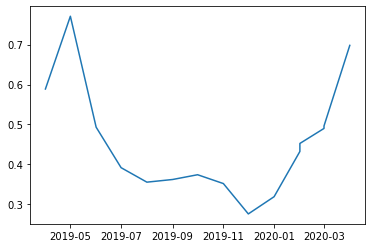

In [12]:
print(means)
plt.clf()
plt.plot(dtime,means)
#plt.plot(dtime,means_var2)
plt.show()

## single point

In [13]:
LAT = 49.2
LON = -9
# change above to match the are of your file

lat_var = nc_data.variables['latitude'][:]
lon_var = nc_data.variables['longitude'][:]

lat_index = np.argmin(np.abs(lat_var - LAT))   
lon_index = np.argmin(np.abs(lon_var - LON))

print(lat_index,lon_index)


557 575


In [14]:
nc_chl_data.shape

(15, 961, 1441)

In [15]:
point_values = []
nc_chl_data = nc_data.variables['CHL'][:]
timesteps = nc_chl_data.shape[0]
for x in range(timesteps):
    print(nc_chl_data[x,lat_index,lon_index])
    point_values.append(nc_chl_data[x,lat_index,lon_index])

0.5726583
0.9926021
0.37731293
0.29292828
0.15609856
0.18282577
0.23662701
--
--
0.32284936
0.30356804
0.2989524
0.34338608
0.35369095
0.7374062


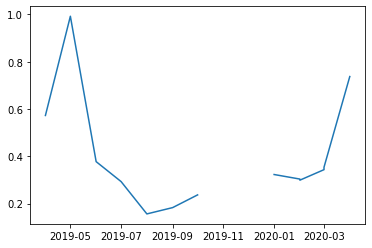

In [16]:
plt.clf()
plt.plot(dtime,point_values)
plt.show()

## Area

In [17]:
LAT = [48.5,49.75]
LON = [-7.2,-5.9]

lat_var = nc_data.variables['latitude'][:]
lon_var = nc_data.variables['longitude'][:]

lat_min_index = np.argmin(np.abs(lat_var - LAT[0]))
lat_max_index = np.argmin(np.abs(lat_var - LAT[1]))

lon_min_index = np.argmin(np.abs(lon_var - LON[0]))
lon_max_index = np.argmin(np.abs(lon_var - LON[1]))


print(lat_min_index,lat_max_index)
print(lon_min_index,lon_max_index)

624 504
748 873


In [21]:
means = []
baseline = []
nc_chl_data = nc_data.variables['CHL'][:]
timesteps = nc_chl_data.shape[0]
for x in range(timesteps):
    area_mean = np.nanmean(nc_chl_data[x,lat_max_index:lat_min_index,lon_min_index:lon_max_index])
    print(area_mean)
    means.append(area_mean)
    baseline.append(0.6)

0.47211796
0.71284246
0.42666075
0.50567704
0.31775367
0.37878186
0.47110513
0.24565145
0.22136413
0.35430688
0.35557806
0.3664087
0.33672848
0.3502439
0.443284


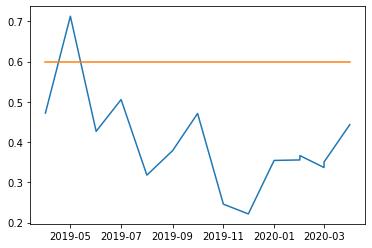

In [23]:
plt.clf()


plt.plot(dtime,means)
plt.plot(dtime,baseline)
plt.show()








In [27]:
# arr = [1,2,3,4,5,6,7,8,9]

# arr[-1]


9

In [19]:
# a = [1,2,3]
# b = [4,5,6]

# c = list(zip(a,b))

# str(c)

'[(1, 4), (2, 5), (3, 6)]'

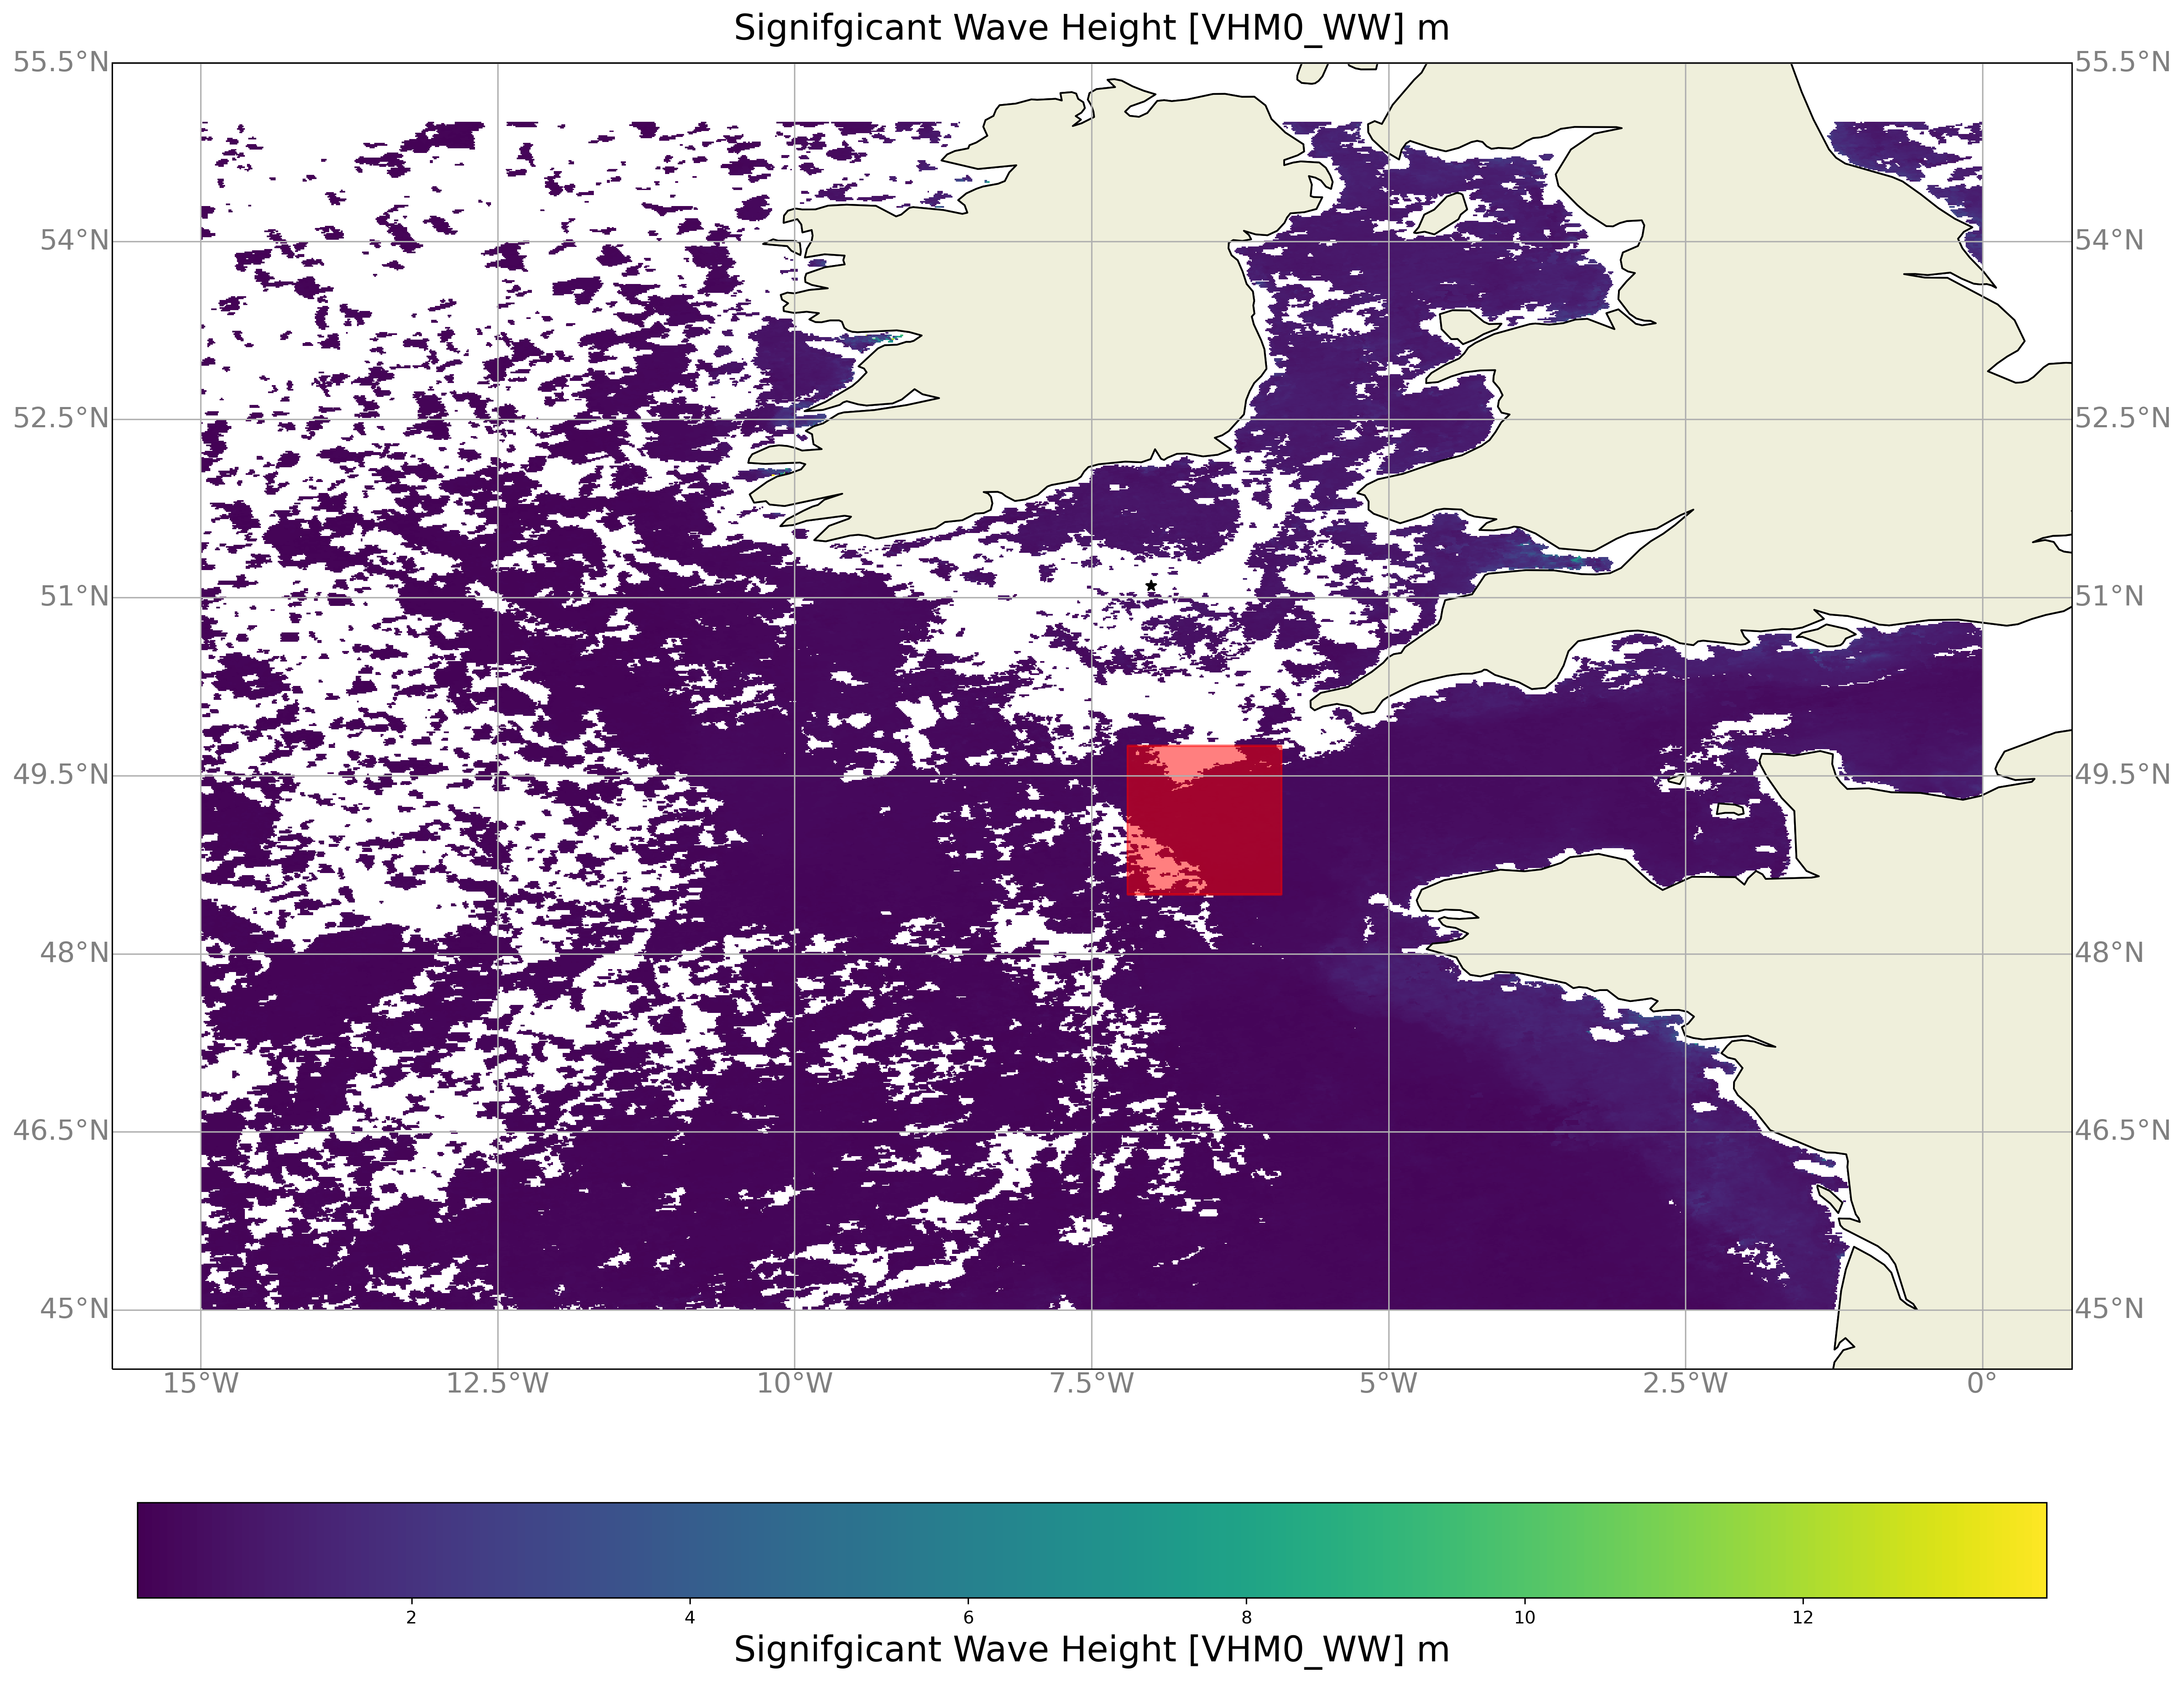

In [25]:
from shapely.geometry.polygon import LinearRing
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

land_resolution = '50m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])
nps = ccrs.NorthPolarStereo()
pc = ccrs.PlateCarree(central_longitude=0.0)

LAT = [48.5,49.75]
LON = [-7.2,-5.9]

lons = [-7.2, -7.2, -5.9, -5.9]
lats = [48.5, 49.75,49.75, 48.5]
ring = LinearRing(list(zip(lons, lats)))




fig1 = plt.figure(figsize=(20, 20), dpi=300)

m = plt.axes(projection=pc)# new projection
f1 = plt.pcolormesh(lon_var, lat_var, np.ma.masked_invalid(nc_chl_data[10]), shading='flat')#, transform=pc)# old projection , vmin=np.log10(0.01), vmax=np.log10(50), cmap=plt.cm.viridis)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07)#, ticks=[np.log10(0.01), np.log10(0.1),np.log10(0.5), np.log10(1),np.log10(3),np.log10(10),np.log10(50)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
cbar.set_label('Signifgicant Wave Height [VHM0_WW] m', fontsize=20)

# add area overlay
m.add_geometries([ring], ccrs.PlateCarree(), facecolor='red',alpha=0.5, edgecolor='red')

# add a single point overlay
m.scatter([-7],[51.1],transform=ccrs.PlateCarree(), c="black", marker="*")


plt.title('Signifgicant Wave Height [VHM0_WW] m', fontsize=20);
plt.show()

In [23]:
nc_chl_data.shape

(3, 1, 881, 609)

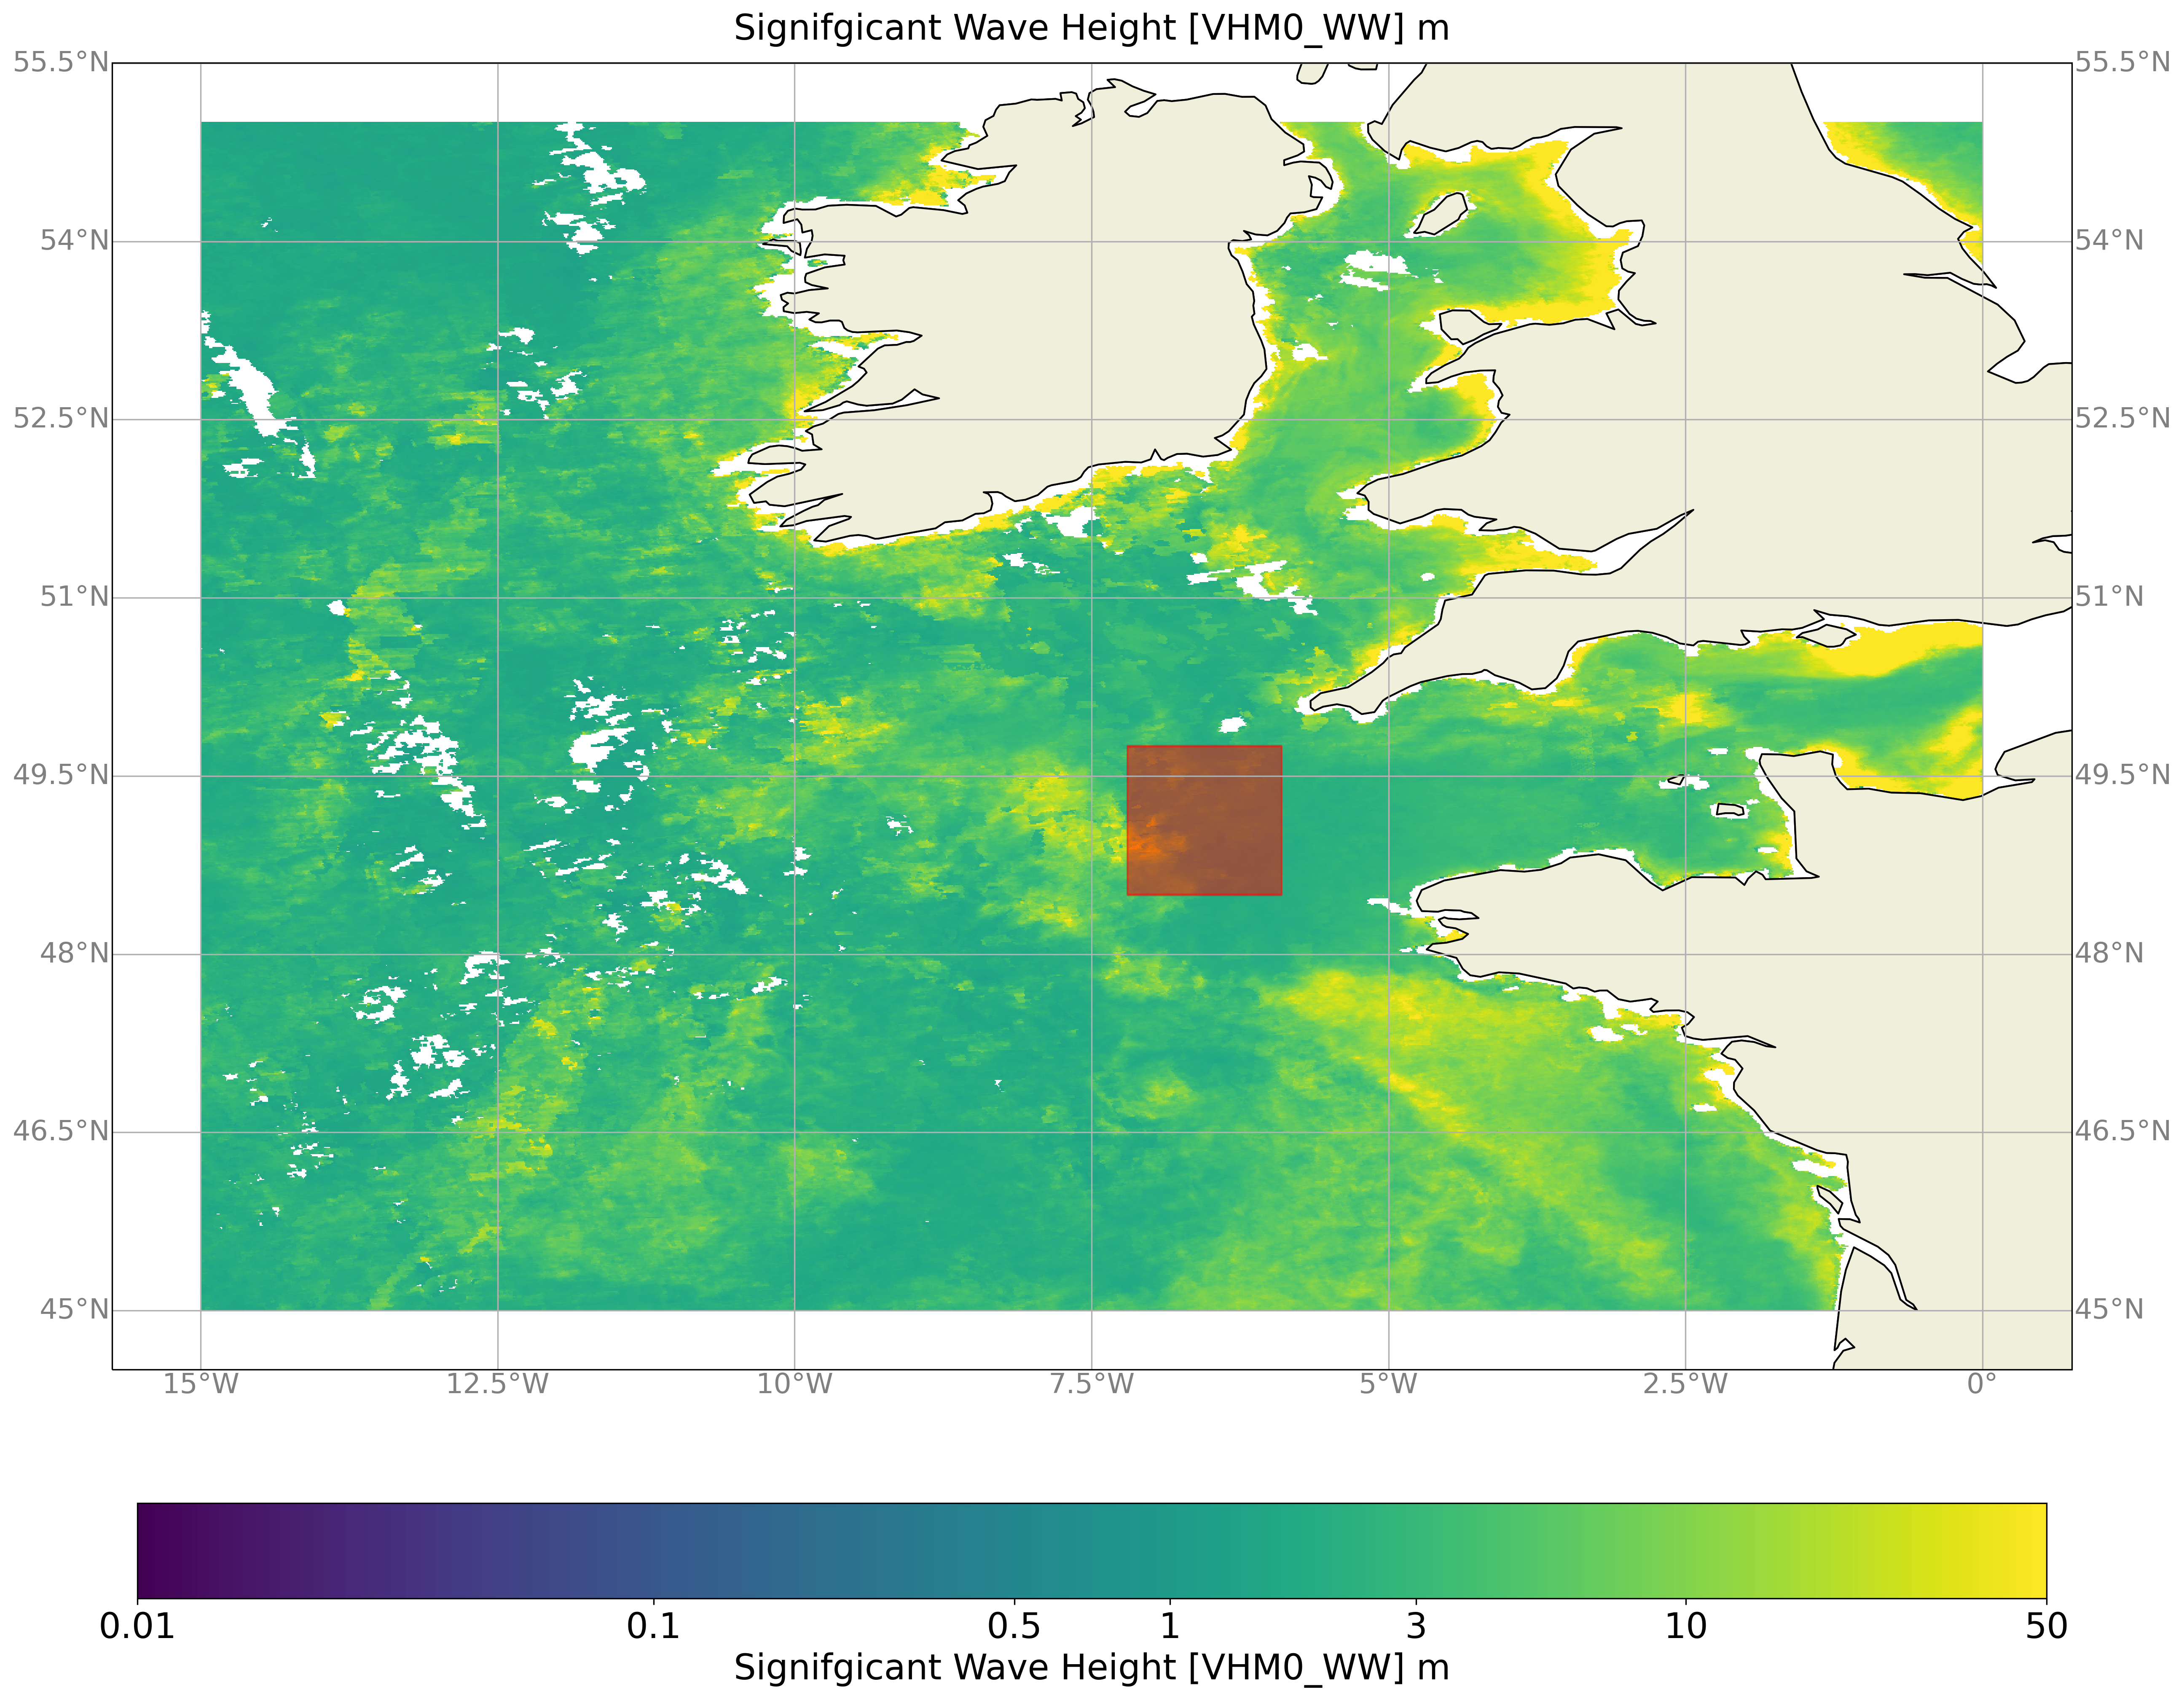

In [31]:
from shapely.geometry.polygon import LinearRing
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

land_resolution = '50m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])
LAT = [48.5,49.75]
LON = [-7.2,-5.9]

lons = [-7.2, -7.2, -5.9, -5.9]
lats = [48.5, 49.75,49.75, 48.5]
ring = LinearRing(list(zip(lons, lats)))

pc = ccrs.PlateCarree(central_longitude=0.0)


fig1 = plt.figure(figsize=(20, 20), dpi=300)

m = plt.axes(projection=pc)
f1 = plt.pcolormesh(lon_var, lat_var, np.ma.masked_invalid(nc_chl_data[0,:]), shading='flat', vmin=np.log10(0.01), vmax=np.log10(50), cmap=plt.cm.viridis)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07, ticks=[np.log10(0.01), np.log10(0.1),np.log10(0.5), np.log10(1),np.log10(3),np.log10(10),np.log10(50)]) 
cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
cbar.set_label('Signifgicant Wave Height [VHM0_WW] m', fontsize=20)

# add area overlay
m.add_geometries([ring], ccrs.PlateCarree(), facecolor='red',alpha=0.5, edgecolor='red')

# # add a single point overlay
# m.scatter([-7],[51.1],transform=ccrs.PlateCarree())


plt.title('Signifgicant Wave Height [VHM0_WW] m', fontsize=20);
plt.show()